<a href="https://colab.research.google.com/github/Hanush007/FoodPanda-EDA/blob/main/Foodpanda_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')  # Use Agg backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure backend if only plt is used
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Additional settings
sns.set(style='whitegrid')


In [34]:
# Load the dataset

data_file = "/content/Foodpanda Analysis Dataset 3.csv"
try:
    data = pd.read_csv(data_file, encoding='ascii', delimiter=',')
    print('Data loaded successfully. Shape:', data.shape)
except Exception as e:
    print('Error loading data:', e)


Data loaded successfully. Shape: (6000, 20)


In [35]:
# Convert date columns to datetime
date_columns = ['signup_date', 'order_date', 'last_order_date', 'rating_date']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')
        print(f'Converted {col} to datetime.')

# Convert age to numeric (note: age is currently stored as string)
if 'age' in data.columns:
    data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Display the first few rows to confirm cleaning
data.head()

Converted signup_date to datetime.
Converted order_date to datetime.
Converted last_order_date to datetime.
Converted rating_date to datetime.


,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,NaN,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled
1,C2831,Male,NaN,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed
2,C2851,Other,NaN,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed
3,C1694,Female,NaN,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed
4,C4339,Other,NaN,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled


EDA

Numeric columns: ['age', 'quantity', 'price', 'order_frequency', 'loyalty_points', 'rating']


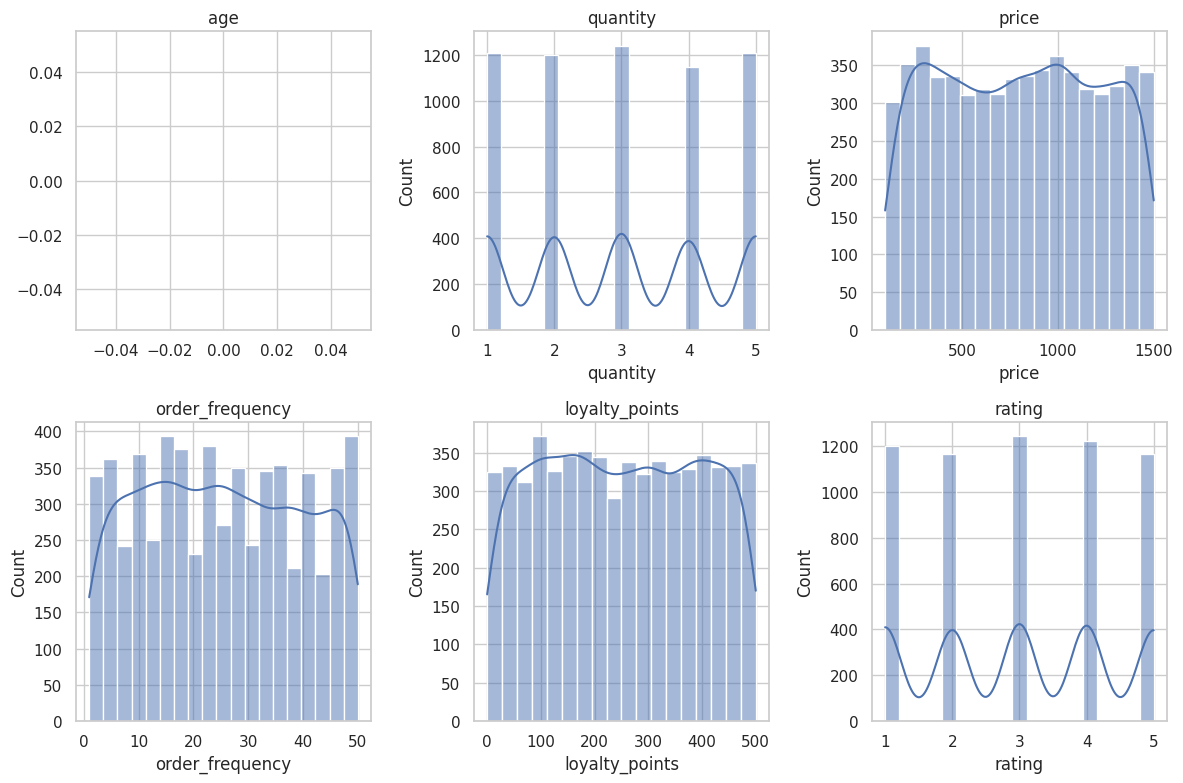

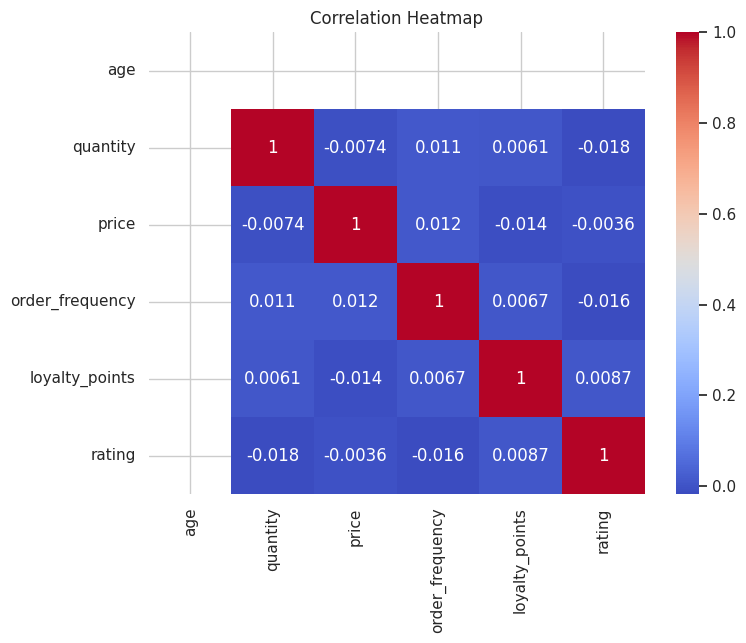

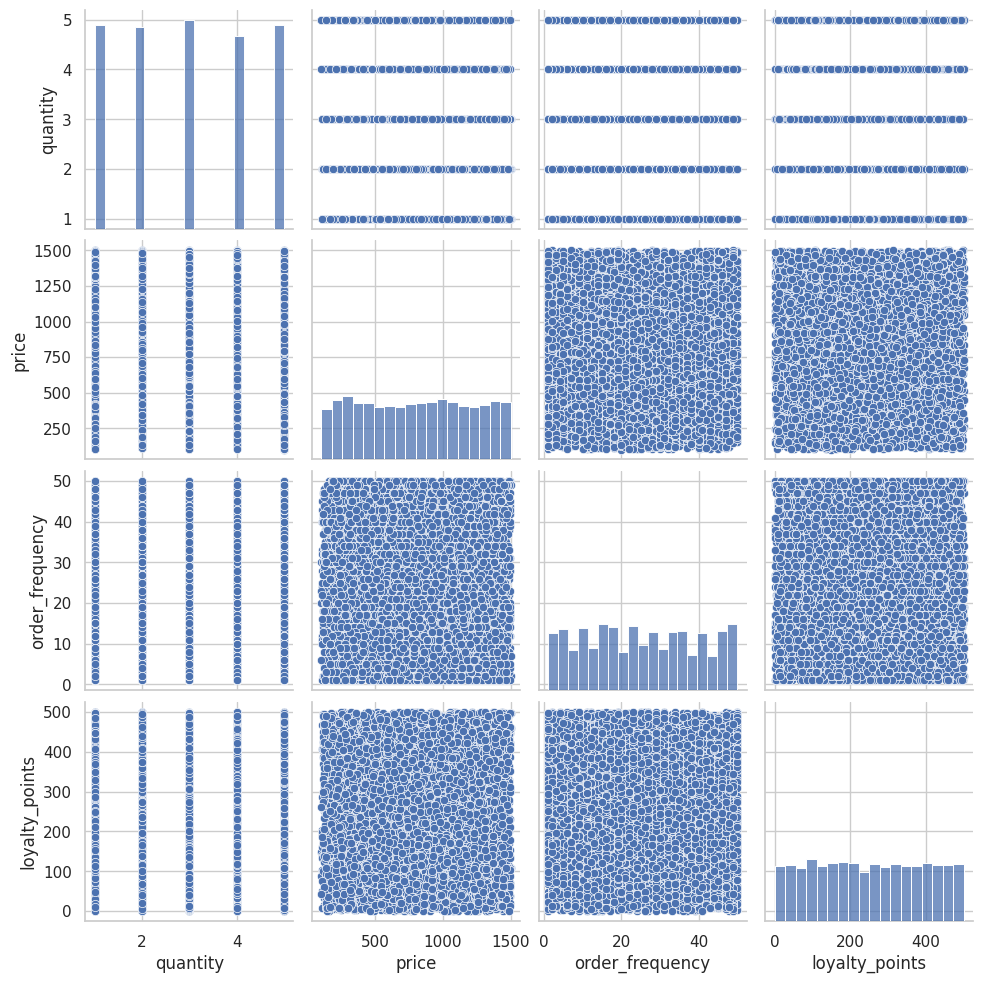

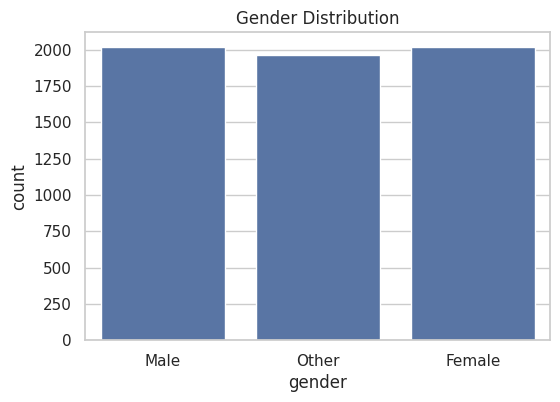

In [36]:
# List of numeric columns for analysis
numeric_df = data.select_dtypes(include=[np.number])
print('Numeric columns:', numeric_df.columns.tolist())

# 1. Histogram for numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(numeric_df[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap (only if 4 or more numeric columns)
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# 3. Pair Plot for a subset of numeric features
subset_cols = ['quantity', 'price', 'order_frequency', 'loyalty_points']
if all(col in numeric_df.columns for col in subset_cols):
    sns.pairplot(data[subset_cols].dropna())
    plt.show()

# 4. Count Plot for categorical variables (for example, gender)
if 'gender' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='gender', data=data)
    plt.title('Gender Distribution')
    plt.show()